In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
%matplotlib inline

In [397]:
df = pd.read_csv('diabetes.csv')

In [398]:
#first 5 rows of dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [399]:
# Info about data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [400]:
# Statistical information about data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Having 0 value in these columns are invalid and does not make any sense

Glucose


BloodPressure

SkinThickness

Insulin

BMI

Better to replace these values as nan values

In [401]:
dfcopy1 = df.copy(deep = True) 

In [402]:
dfcopy1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfcopy1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [403]:
# checking missing values

dfcopy1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Lets understand Distribution of data

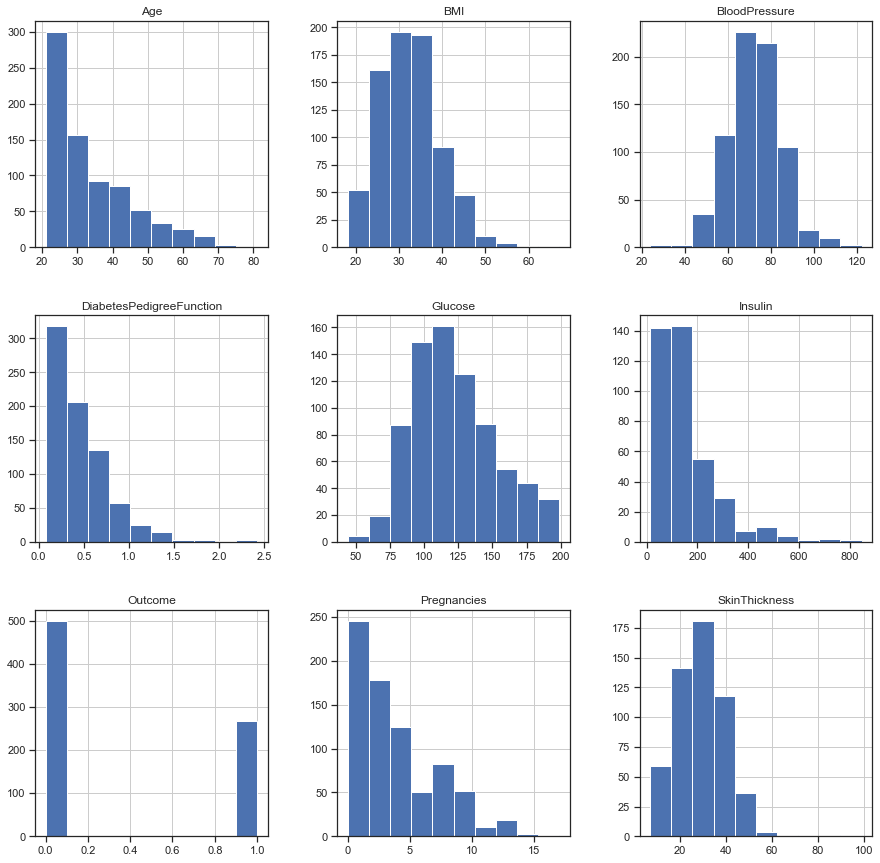

In [404]:
p = dfcopy1.hist(figsize = (15,15))

In [405]:

dfcopy1.Glucose.fillna(dfcopy1.Glucose.mean(),inplace=True) #Since Glucose is normally distributed we fill it with mean

In [406]:
dfcopy1.Glucose.isnull().sum()

0

In [407]:
dfcopy1['BloodPressure'].fillna(dfcopy1['BloodPressure'].mean(), inplace = True)


In [408]:
dfcopy1.BloodPressure.isnull().sum()

0

In [409]:
dfcopy1['SkinThickness'].fillna(dfcopy1['SkinThickness'].median(), inplace = True)


In [410]:
dfcopy1.SkinThickness.isnull().sum()

0

In [411]:
dfcopy1['Insulin'].fillna(dfcopy1['Insulin'].median(), inplace = True)


In [412]:
dfcopy1.Insulin.isnull().sum()

0

In [413]:
dfcopy1['BMI'].fillna(dfcopy1['BMI'].median(), inplace = True)


In [414]:
dfcopy1.BMI.isnull().sum()

0

Let see Distribution of data after removal of Nan


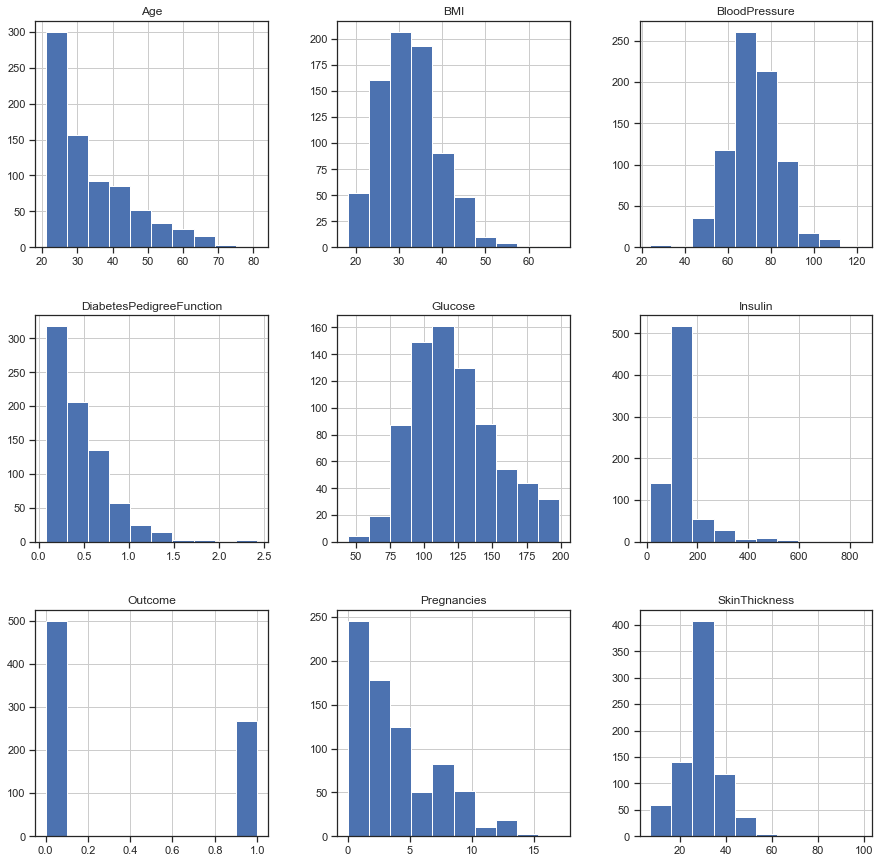

In [415]:
p = dfcopy1.hist(figsize = (15,15))

0    500
1    268
Name: Outcome, dtype: int64


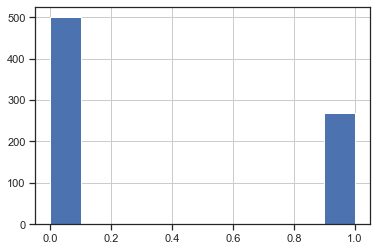

In [416]:
print(dfcopy1.Outcome.value_counts())
dfcopy1.Outcome.hist()

Clearly The above graph shows that the data is biased towards  0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

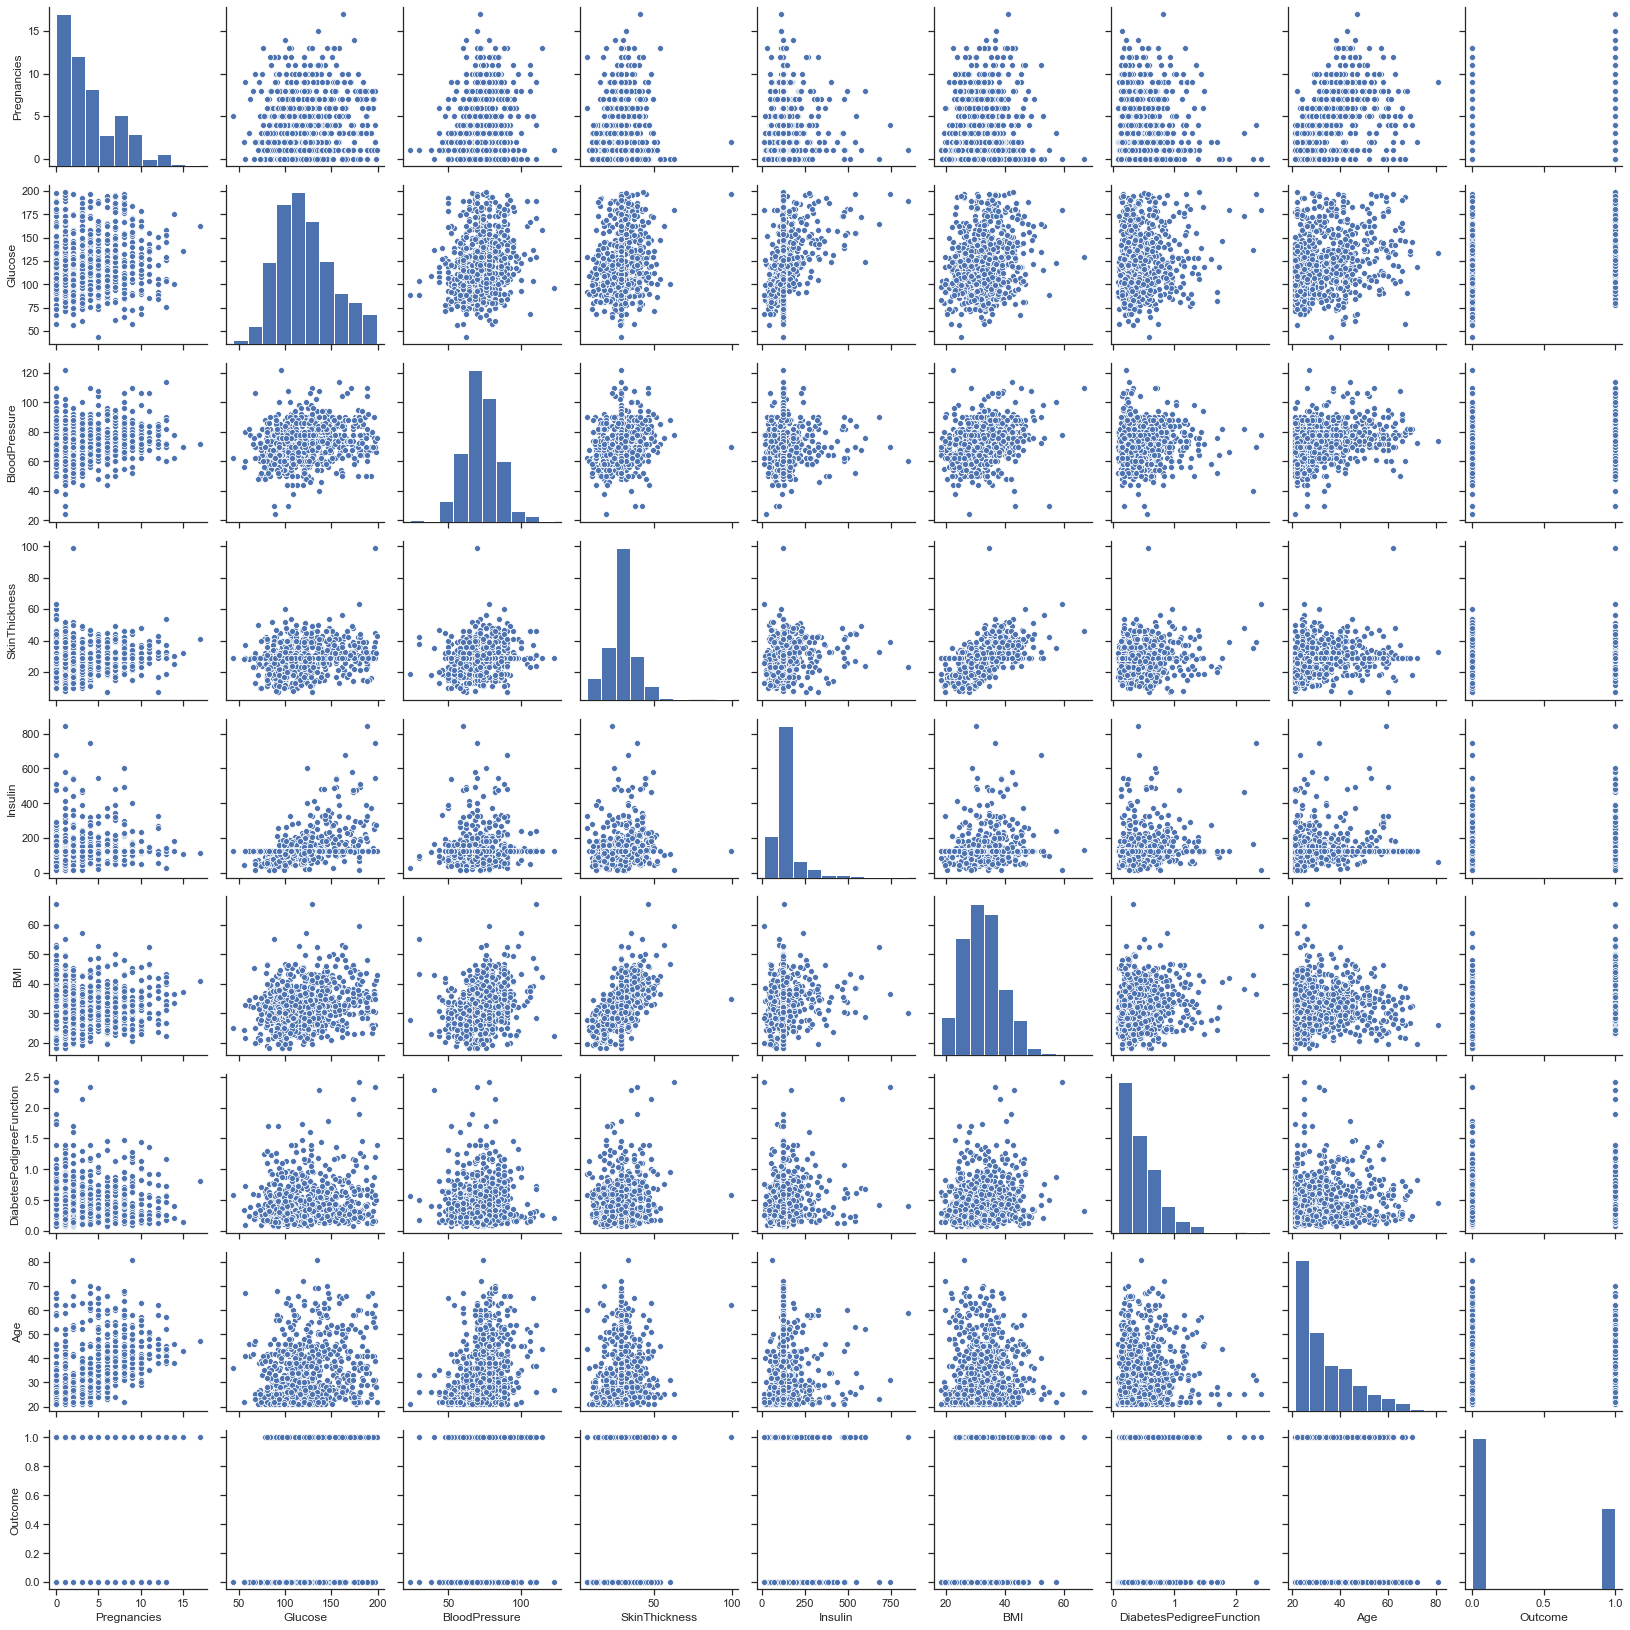

In [417]:
s = sns.pairplot(dfcopy1)

###### Heatmap for data to check corelation beteween variables 

Corelation coefficient Varies between -1 to +1.the value close to zero are weakly corelated and value close to -1 and +1 are strongly corelated


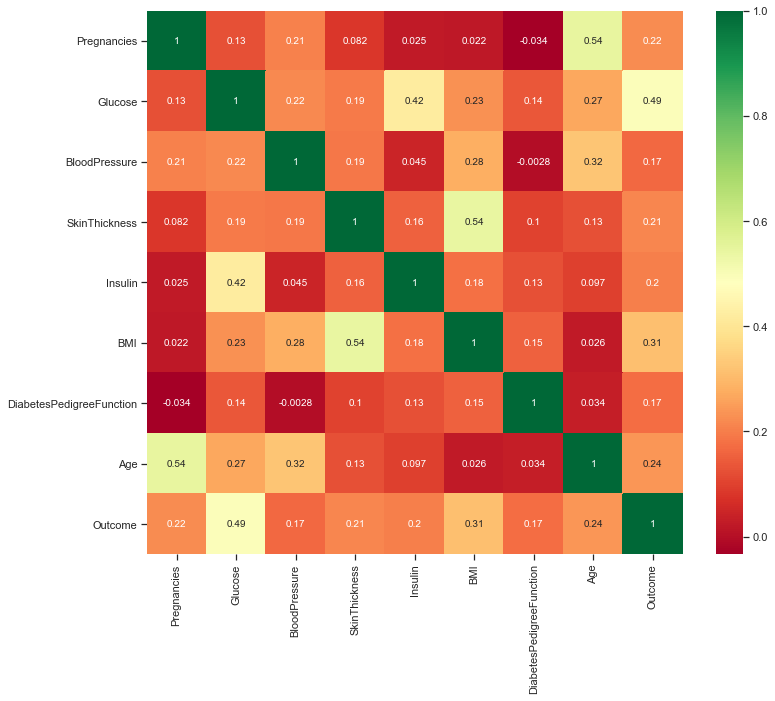

In [418]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(dfcopy1.corr(), annot=True,cmap ='RdYlGn')

In [419]:
dfcopy1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


There are no variables that are highly corelated

In [420]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [421]:
X = dfcopy1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [422]:
y = dfcopy1.Outcome

In [434]:
dfcopy1.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
139,5,105.0,72.0,29.0,325.0,36.9,0.159,28,0
584,8,124.0,76.0,24.0,600.0,28.7,0.687,52,1
324,2,112.0,75.0,32.0,125.0,35.7,0.148,21,0
327,10,179.0,70.0,29.0,125.0,35.1,0.200,37,0
180,6,87.0,80.0,29.0,125.0,23.2,0.084,32,0
431,3,89.0,74.0,16.0,85.0,30.4,0.551,38,0
281,10,129.0,76.0,28.0,122.0,35.9,0.280,39,0
164,0,131.0,88.0,29.0,125.0,31.6,0.743,32,1
61,8,133.0,72.0,29.0,125.0,32.9,0.270,39,1
718,1,108.0,60.0,46.0,178.0,35.5,0.415,24,0


In [424]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

###### I have Tried different Classifier Models, but Logistic Regression gave me good accuracy

In [425]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#Logistic Model With default Parameters
model = LogisticRegression(penalty='l2')

# fit the model with train data
model.fit(X_train,y_train.ravel())
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7864583333333334


C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [426]:
from sklearn.metrics import confusion_matrix,classification_report

In [427]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

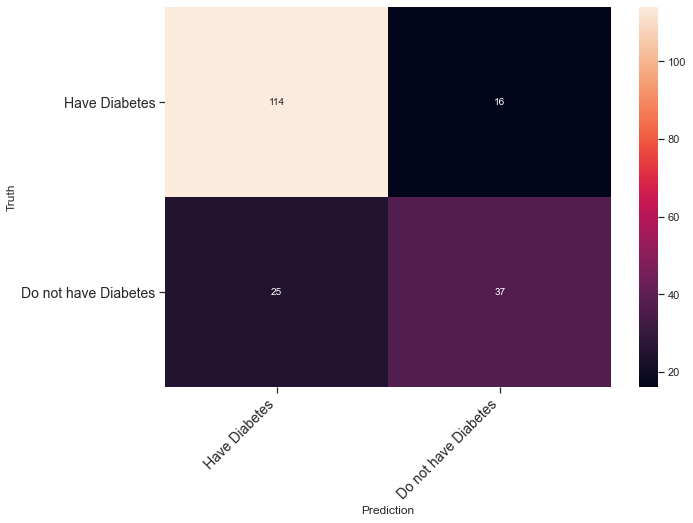

In [428]:
cm = confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,["Have Diabetes","Do not have Diabetes"])

###### High precision relates to the low false positive rate.
###### High recall relates to a low false negative rate
    

In [429]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.70      0.60      0.64        62

    accuracy                           0.79       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192



In [430]:
X_test.iloc[1].ravel()

array([  2.   , 107.   ,  74.   ,  30.   , 100.   ,  33.6  ,   0.404,
        23.   ])

###### Dumping model Into Pickle file for  Deployment

In [431]:
import pickle


pickle.dump(model, open('finalmodel.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('finalmodel.pkl','rb'))
model.predict(X_test)


array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)